In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('./Precos_Imoveis.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.shape

(1460, 81)

In [6]:
## Mostrando que não há dados duplicados
df.drop_duplicates()
df.shape

(1460, 81)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [8]:
df['SaleCondition'].value_counts(dropna=False)

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

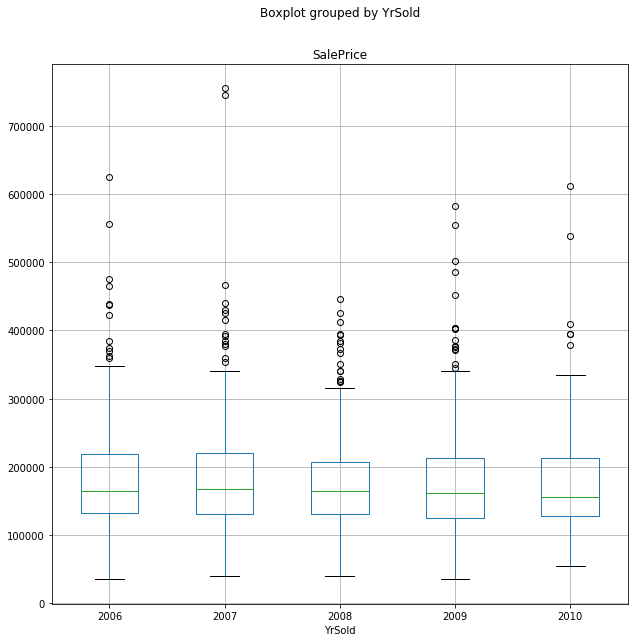

In [9]:
df.boxplot(column='SalePrice', by='YrSold', figsize=(10, 10))

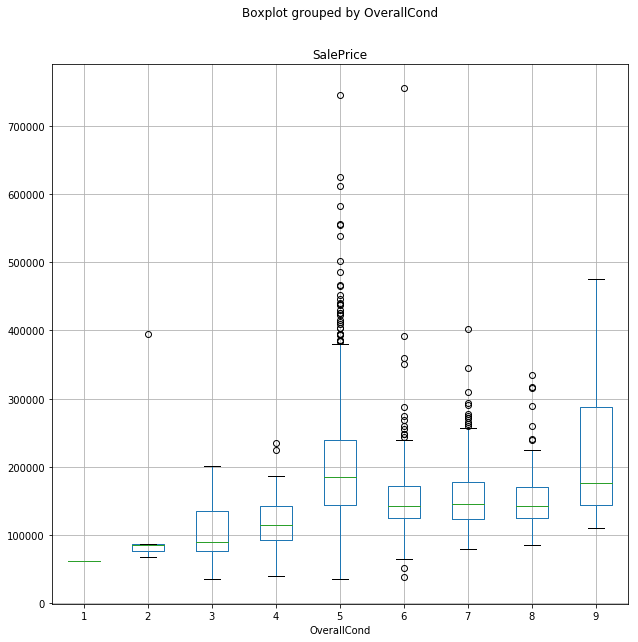

In [10]:
df.boxplot(column='SalePrice', by='OverallCond', figsize=(10, 10))

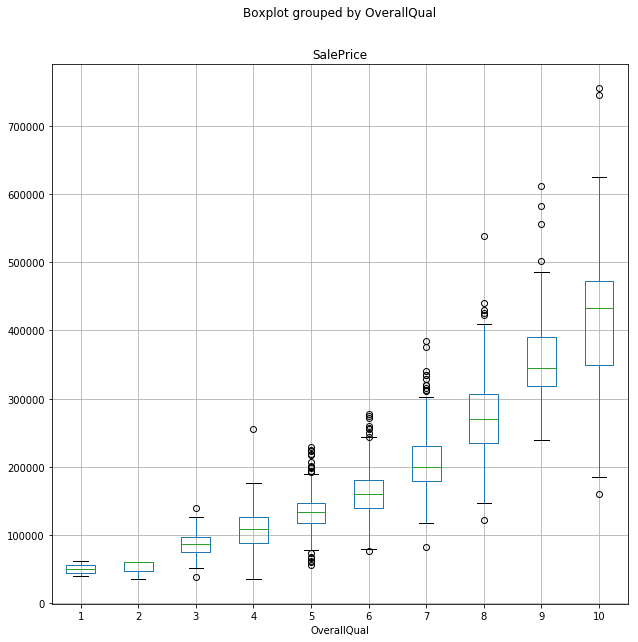

In [11]:
df.boxplot(column='SalePrice', by='OverallQual', figsize=(10, 10))

In [12]:
df[df['SalePrice']>700000]['OverallQual']

691     10
1182    10
Name: OverallQual, dtype: int64

## Analisando Outliers de GrLivArea

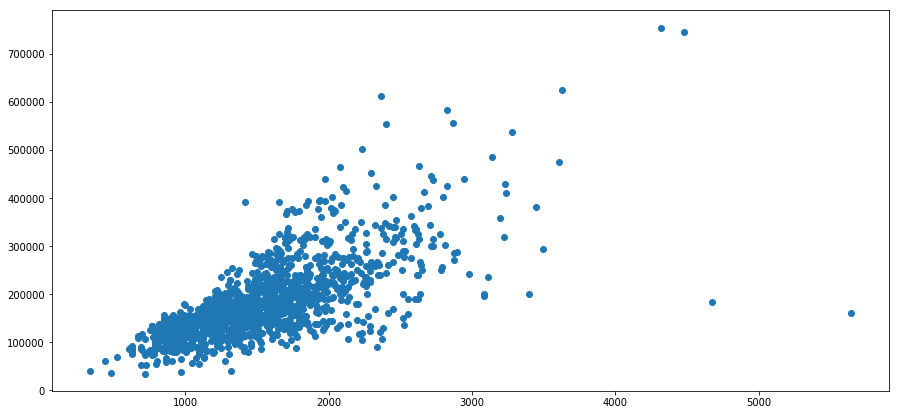

In [13]:
plt.figure(figsize=(15,7))
plt.scatter(y=df['SalePrice'], x=df['GrLivArea'])
plt.show()

* Investigando a relação entre SalePrice e GrLivArea, temos 2 pontos que fogem da linha de tendência. Esses pontos devem ser analisados mais a fundo para que sejam descartados se representarem um erro ou se não houver justificativa para suas discrepâncias em relação às outras observações

In [22]:
df[df['GrLivArea']> 4000][['GrLivArea','OverallQual', 'YearBuilt', 'MiscFeature', 'MiscVal', 'GarageArea', 'SaleCondition', 'SalePrice']]

,GrLivArea,OverallQual,YearBuilt,MiscFeature,MiscVal,GarageArea,SaleCondition,SalePrice
523,4676,10,2007,NaN,0,884,Partial,184750
691,4316,10,1994,NaN,0,832,Normal,755000
1182,4476,10,1996,NaN,0,813,Abnorml,745000
1298,5642,10,2008,NaN,0,1418,Partial,160000


* Analisando os imóveis com a GrLivArea > 4000, é possível encontrar os dois pontos que estão com o preço muito abaixo da linha de tendência. A sua justificativa se encontra na variável SaleCondition, que, nos dois casos, é "Partial".

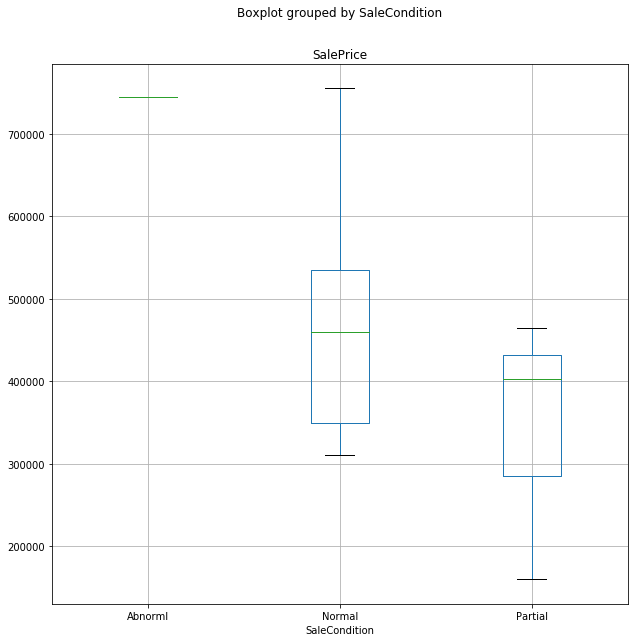

In [34]:
df[df['OverallQual'] == 10].boxplot(column='SalePrice', by='SaleCondition', figsize=(10, 10))

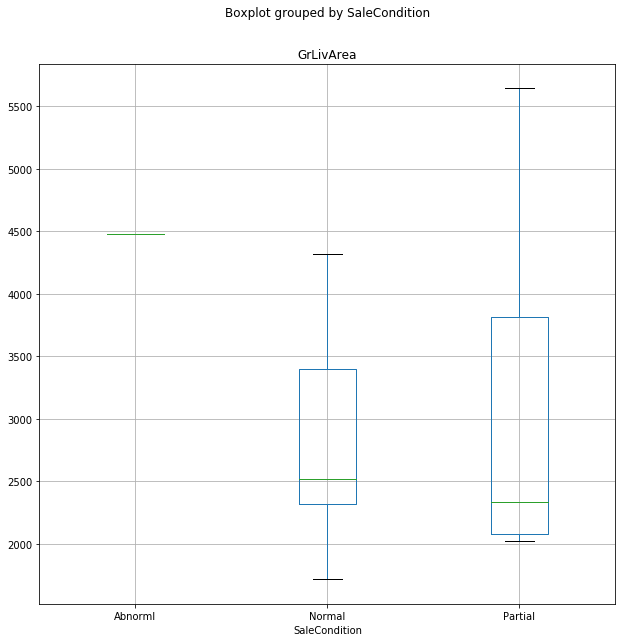

In [39]:
df[df['OverallQual'] == 10].boxplot(column='GrLivArea', by='SaleCondition', figsize=(10, 10))

* Como é possível notar, as vendas parciais geralmente ocorrem para imóveis de grandes áreas, e ,ao comparar com outras vendas de mesma Overall Condition, percebe-se que seus valores são menores do que de uma venda normal

## Analisando LotArea

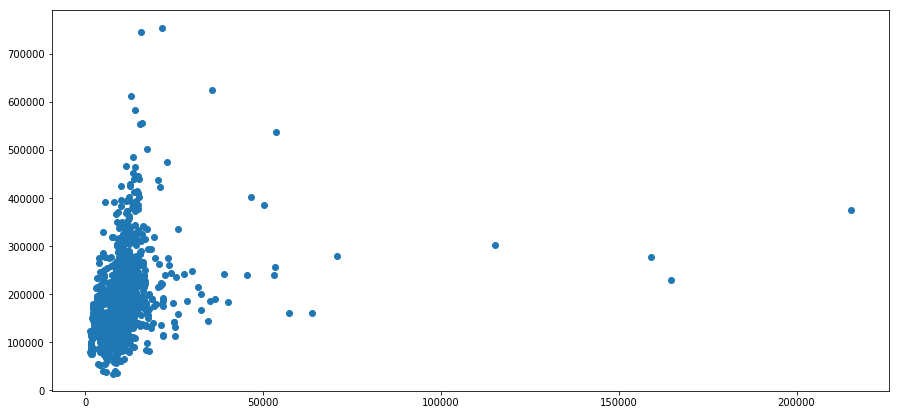

In [47]:
plt.figure(figsize=(15,7))
plt.scatter(y=df['SalePrice'], x=df['LotArea'])
plt.show()

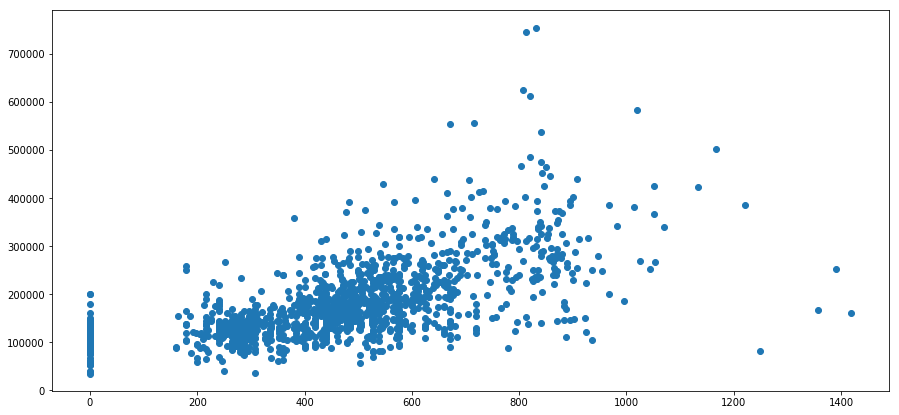

In [45]:
plt.figure(figsize=(15,7))
plt.scatter(y=df['SalePrice'], x=df['GarageArea'])
plt.show()

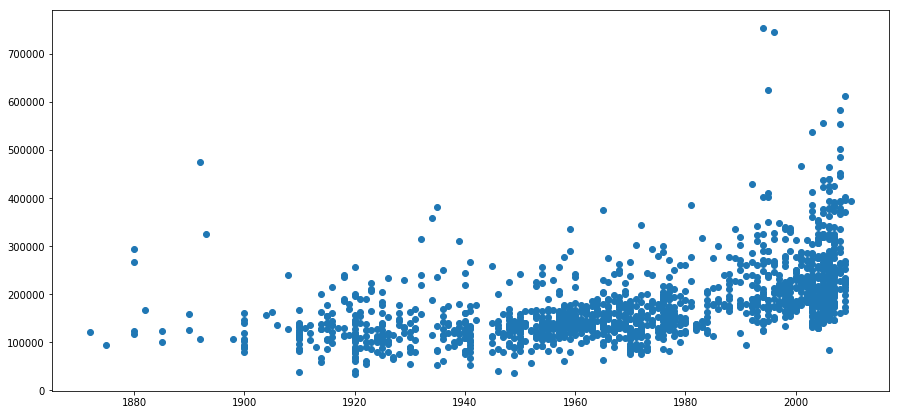

In [42]:
plt.figure(figsize=(15,7))
plt.scatter(y=df['SalePrice'], x=df['YearBuilt'])
plt.show()

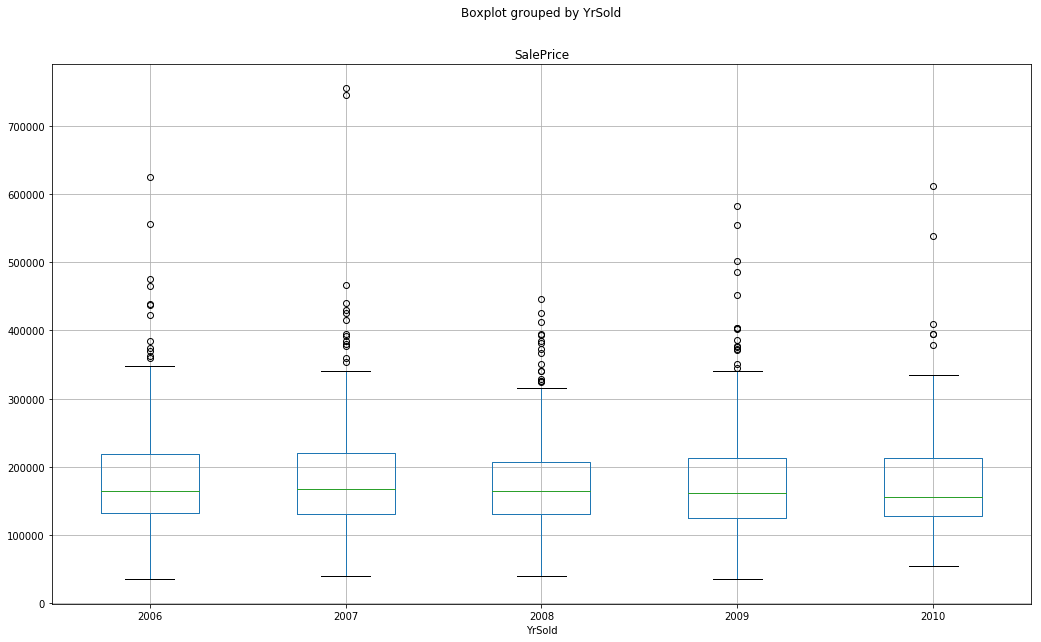

In [11]:
bp = df.boxplot(column='SalePrice', by='YrSold', figsize=(10, 10))

In [41]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [52]:
colormap = sns.diverging_palette(220, 10, as_cmap = True)

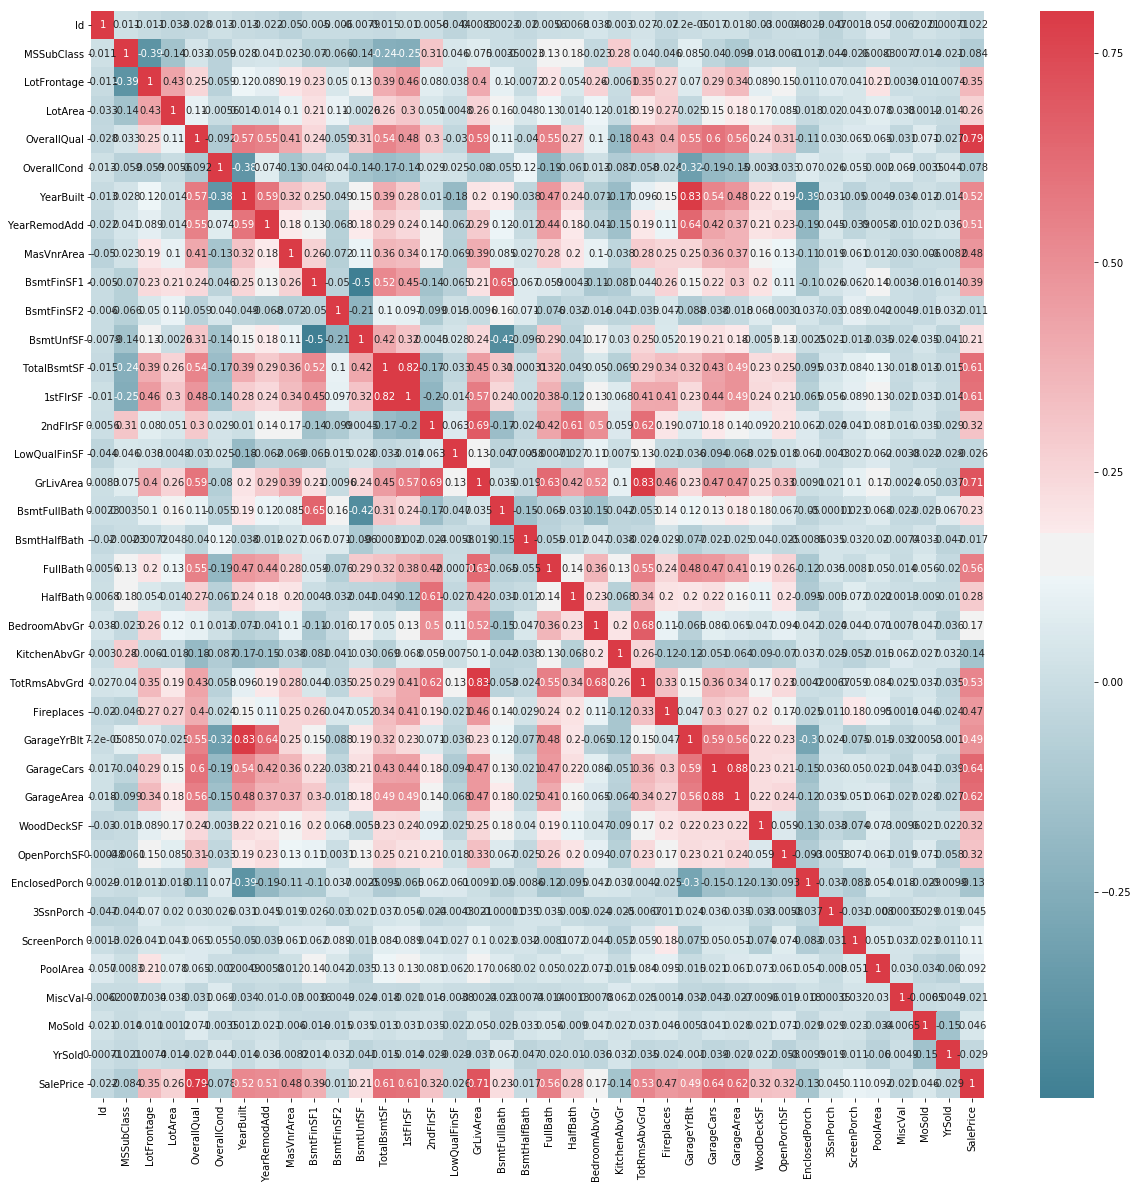

In [55]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corrmat, vmax=.8, annot=True, cmap = colormap);

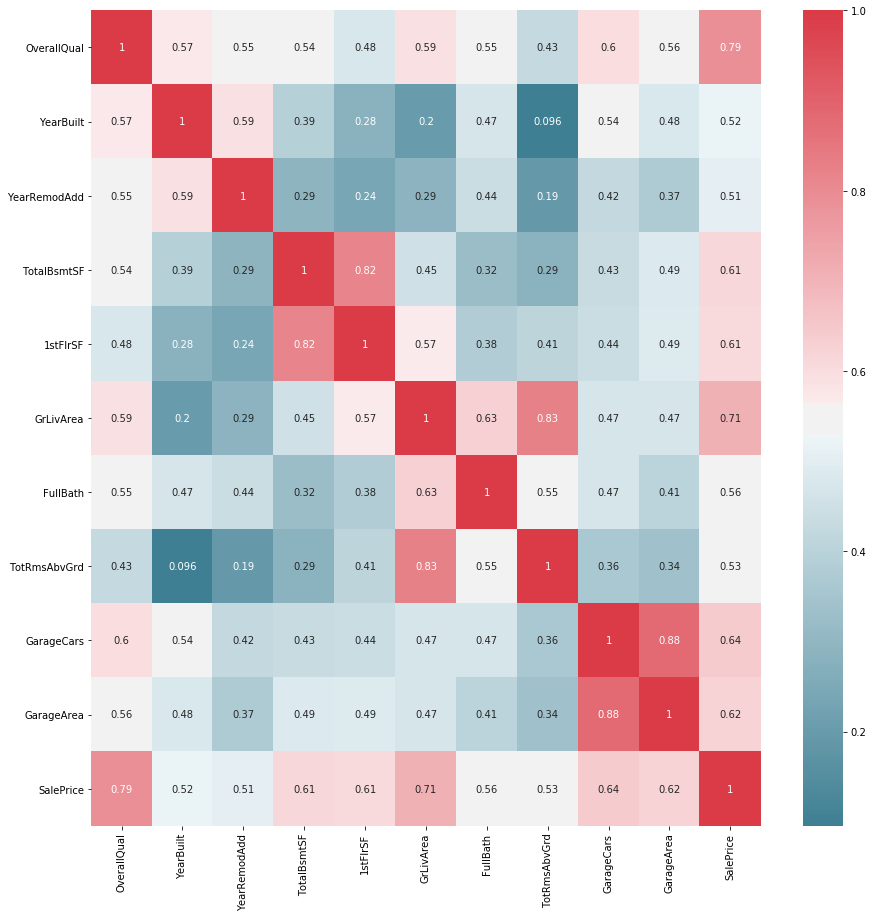

In [53]:
corrmat = df.corr()
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.5]
plt.figure(figsize=(15,15))
g = sns.heatmap(df[top_corr_features].corr(),annot=True, cmap = colormap)

In [47]:
corr = df.corr()
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr.SalePrice)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

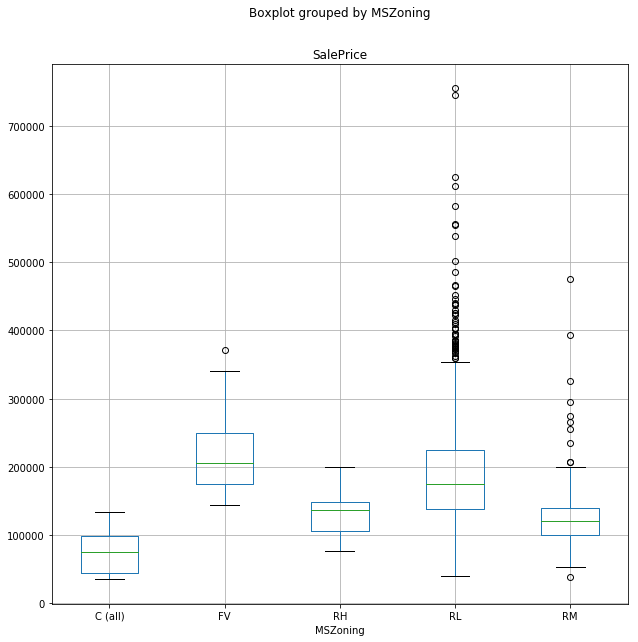

In [55]:
df.boxplot(column='SalePrice', by='MSZoning', figsize=(10, 10))

In [59]:
df['MSZoning'].value_counts(dropna=False)

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [60]:
df['Neighborhood'].value_counts(dropna=False)

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64